# Plot LAT trigger history for a specfied timespan

###Robert Cameron, November 2015

In [1]:
# specify the time range for the trend plot of LAT triggers

start = "2014-01-01"
end = "2016-01-01"

In [2]:
from astropy.table import Table, Column
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import datetime as dt
%matplotlib inline
import time
import calendar
import re
plt.rc('figure', figsize = [16, 12])
plt.rc('font', size = 20)

In [3]:
t_start = calendar.timegm(time.strptime(start, '%Y-%m-%d'))
t_end = calendar.timegm(time.strptime(end, '%Y-%m-%d'))
# read ASCII file of LAT triggers
trigfile = "/Users/rc/Documents/GLAST/ISOC/LATmetrics/triggers/gem.sent"
trigtab = Table.read(trigfile, format='ascii')
ymd = trigtab[0]
trigtab

col1,col2,col3,col4,col5
str320,int64,int64,float64,float64
2008-06-24,13,27,20.0,0.0
2008-06-25,13,27,20.0,8322070.0
2008-06-26,13,27,20.0,52031447.0
2008-06-27,13,27,20.0,137402797.0
2008-06-28,13,27,20.0,225659586.0
2008-06-29,13,27,20.0,358894123.0
2008-06-30,13,27,20.0,447223545.0
2008-07-01,13,27,20.0,582563616.0
2008-07-02,13,27,20.0,718544268.0


In [3]:
t_start = calendar.timegm(time.strptime(start, '%Y-%m-%d'))
t_end = calendar.timegm(time.strptime(end, '%Y-%m-%d'))
# read ASCII file of LAT triggers
trigfile = "/Users/rc/Documents/GLAST/ISOC/LATmetrics/triggers/gem.sent"
trigtab = Table.read(trigfile, format='ascii')


err_count = {}
n_blank = 0
lon_in = []
lat_in = []
lon_out = []
lat_out = []
per_err = 0
with open("/Users/rc/Documents/GLAST/ISOC/LATmetrics/memerr/geosaa.out") as fi:
    for line in fi:
        if not line.strip():
            n_blank += 1
            continue
        line = re.sub('[\(\)\:]',' ',line)
        ws = line.split()
        key1 = ws[0]
        key2 = (ws[0],ws[10])
        err_count[key1] = err_count.get(key1, 0) + 1
        err_count[key2] = err_count.get(key2, 0) + 1
        if float(ws[5]) > t_start and float(ws[5]) < t_end:
#            print (ws[-1])
            per_err += 1
            if int(ws[-1]) == 1:
                lon_in.append(ws[-3])
                lat_in.append(ws[-2])
            else:
                lon_out.append(ws[-3])
                lat_out.append(ws[-2])
fi.close()

In [4]:
(t_start, t_end)

(1427846400, 1435708800)

In [5]:
print (n_blank,"blank lines (1 per day)\n")
print ("Cumulative Errors\tSIU\tEPU0\tEPU1")
print ("Single Bit\t\t%d\t%d\t%d" % (err_count[('SIU','3')],err_count[('EPU0','3')],err_count[('EPU1','3')]))
print ("Double Bit\t\t%d\t%d\t%d" % (err_count[('SIU','4')],err_count[('EPU0','4')],err_count[('EPU1','4')]))
print ("Total\t\t\t%d\t%d\t%d" % (err_count['SIU'],err_count['EPU0'],err_count['EPU1']))

2628 blank lines (1 per day)

Cumulative Errors	SIU	EPU0	EPU1
Single Bit		26502	10349	29515
Double Bit		490	181	701
Total			26992	10530	30216


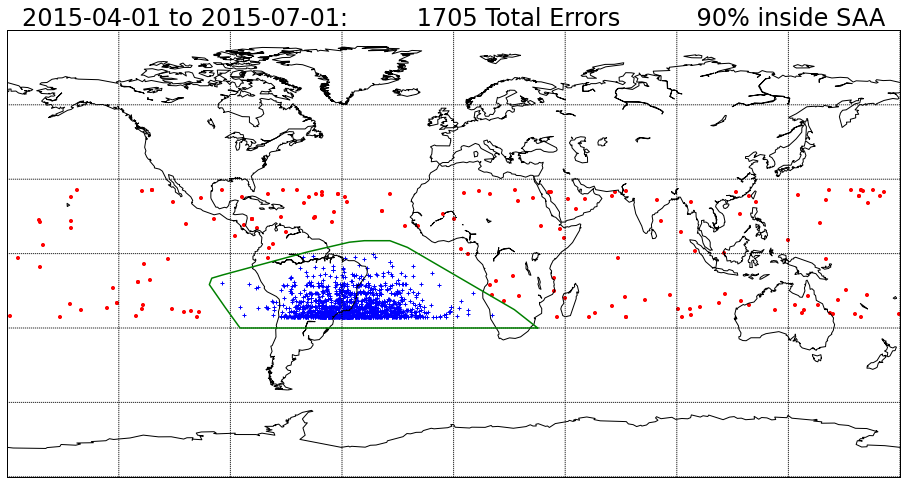

In [6]:
saapercent = 100*len(lat_in)/per_err

saalon = [ 33.9,  24.5, -18.6, -25.7, -36.0, -42.0, -58.8, -93.1, -97.5, -98.5, -92.1, -86.1,  33.9]
saalat = [-30.0, -22.6,   2.5,   5.2,   5.2,   4.6,   0.7,  -8.6,  -9.9, -12.5, -21.7, -30.0, -30.0]

m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180)
m.drawcoastlines()
#m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,45.))
#m.drawmapboundary(fill_color='aqua')
m.plot(saalon,saalat,linewidth=1.5,color='g')
m.scatter(lon_in,lat_in,s=15,marker='+',color='b')
m.scatter(lon_out,lat_out,s=9,marker='o',color='r')
plt.title("%s to %s:         %s Total Errors          %d%% inside SAA" % (start,end,per_err,saapercent))
plt.show()